<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#＜レポート名はここ＞" data-toc-modified-id="＜レポート名はここ＞-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>＜レポート名はここ＞</a></span></li><li><span><a href="#摘出不良" data-toc-modified-id="摘出不良-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>摘出不良</a></span></li><li><span><a href="#実験室" data-toc-modified-id="実験室-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>実験室</a></span><ul class="toc-item"><li><span><a href="#ヒートマップ" data-toc-modified-id="ヒートマップ-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>ヒートマップ</a></span><ul class="toc-item"><li><span><a href="#csvからpivotしてヒートマップを作成する例" data-toc-modified-id="csvからpivotしてヒートマップを作成する例-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>csvからpivotしてヒートマップを作成する例</a></span></li><li><span><a href="#もう一つの例" data-toc-modified-id="もう一つの例-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>もう一つの例</a></span></li></ul></li><li><span><a href="#ヒートマップ" data-toc-modified-id="ヒートマップ-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>ヒートマップ</a></span></li><li><span><a href="#製品ごとの不良摘出状況（予算と実績の比較）" data-toc-modified-id="製品ごとの不良摘出状況（予算と実績の比較）-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>製品ごとの不良摘出状況（予算と実績の比較）</a></span></li><li><span><a href="#工程ごとの不良摘出状況（予算と実績の比較）" data-toc-modified-id="工程ごとの不良摘出状況（予算と実績の比較）-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>工程ごとの不良摘出状況（予算と実績の比較）</a></span></li></ul></li><li><span><a href="#Jupyter-notebookのTips" data-toc-modified-id="Jupyter-notebookのTips-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Jupyter notebookのTips</a></span></li><li><span><a href="#スクリプトを非表示にするボタン" data-toc-modified-id="スクリプトを非表示にするボタン-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>スクリプトを非表示にするボタン</a></span></li></ul></div>

In [1]:
'''
使い方：
一度すべてを実行しておく。
以下の「スクリプトを非表示にする」をクリックする。

前提条件：
https://qiita.com/simonritchie/items/d7dccb798f0b9c8b1ec5
に記載の設定を一通りしておく。
・HTMLを自動で生成する
・目次を自動で生成する
・可能であれば、nbextensionsをインストール＆設定しておく
'''
pass

# ＜レポート名はここ＞

In [2]:
# 初期化の類

In [3]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
%config InlineBackend.figure_format = 'retina'

In [5]:
# 豆腐対策
import matplotlib as mpl
#print(mpl.rcParams['font.family'])
plt.rcParams['font.family'] = 'IPAPGothic' #全体のフォントを設定
# macの場合は、フォントをインストールした後、以下も実施
# rm ~/.matplotlib/*.cache
# rm ~/.matplotlib/fontList.json 

# 摘出不良

In [ ]:
# 摘出数
# 対策待ち
# 確認済み
# 潜在

In [152]:
%%bash
echo "
製品名, バージョン, 摘出数, 対策待ち, 確認済み, 潜在不良, 対策待ち(QE), 確認済み(QE)
AWS, 3.1.0, 40, 23, 17, 8, 3, 2
GCP, 4.5.0, 30, 19, 11, 9, 5, 4
Azure, 2.2.0, 50, 35, 15, 12, 9, 1
Alibaba, 1.1.0, 70, 51, 19, 38, 18, 13
" > temp.csv

In [153]:
df = pd.read_csv('temp.csv')

In [154]:
df_i = df.set_index('製品名')

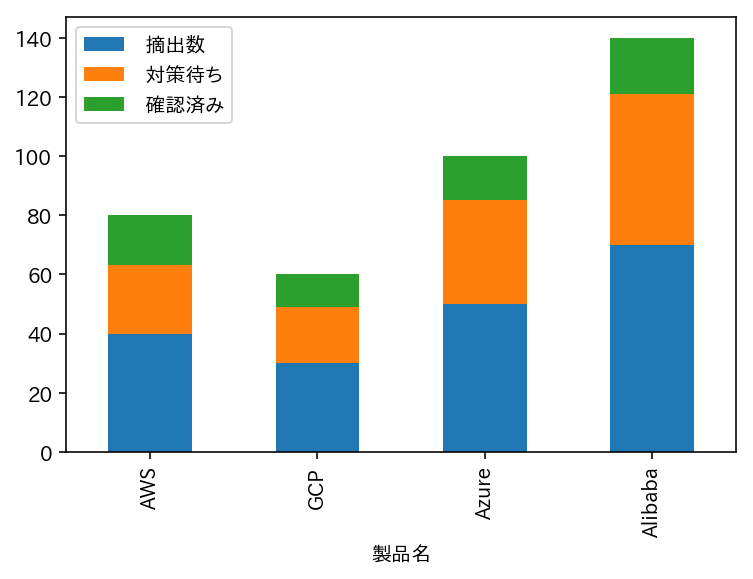

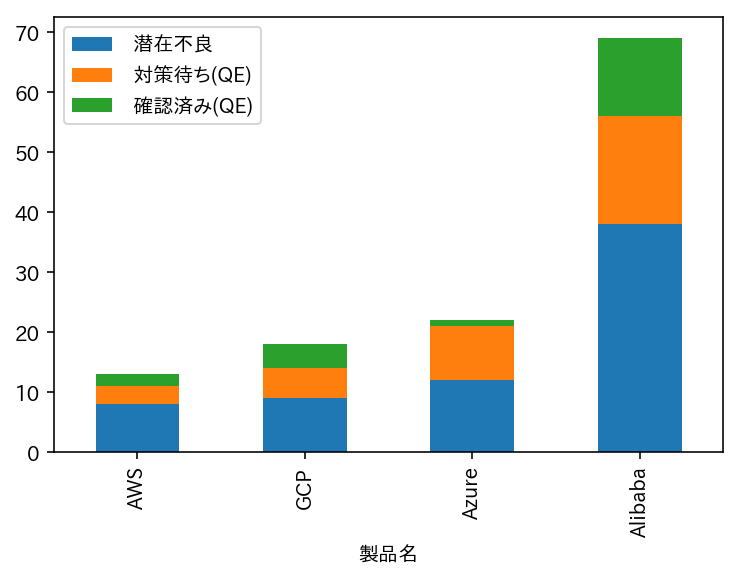

In [156]:
_ = df_i.iloc[:, :4].plot.bar(stacked=True)
_ = df_i.iloc[:, 5:].plot.bar(stacked=True)

# 実験室

## ヒートマップ

### csvからpivotしてヒートマップを作成する例

In [6]:
%%bash
echo "
product,version,CT, ST, UCT
AWS(予),1.2.3,13,14,15
AWS(実),1.2.3,13,14,16
GCP(予),1.4.2,23,24, 17
GCP(実),1.4.2,23,24,19
Azure(予),1.0.2,32,33,34
Azure(実),1.0.2,32,33,34
" > temp.csv

In [7]:
df = pd.read_csv('temp.csv')

In [8]:
df

,product,version,CT,ST,UCT
0,AWS(予),1.2.3,13,14,15
1,AWS(実),1.2.3,13,14,16
2,GCP(予),1.4.2,23,24,17
3,GCP(実),1.4.2,23,24,19
4,Azure(予),1.0.2,32,33,34
5,Azure(実),1.0.2,32,33,34


In [9]:
df_pivot = pd.pivot_table(data=df, values='CT', columns=['product'], index=['version'], aggfunc=np.mean)

In [10]:
df_pivot.fillna(0)

product,AWS(予),AWS(実),Azure(予),Azure(実),GCP(予),GCP(実)
version,,,,,,
1.0.2,0.0,0.0,32.0,32.0,0.0,0.0
1.2.3,13.0,13.0,0.0,0.0,0.0,0.0
1.4.2,0.0,0.0,0.0,0.0,23.0,23.0


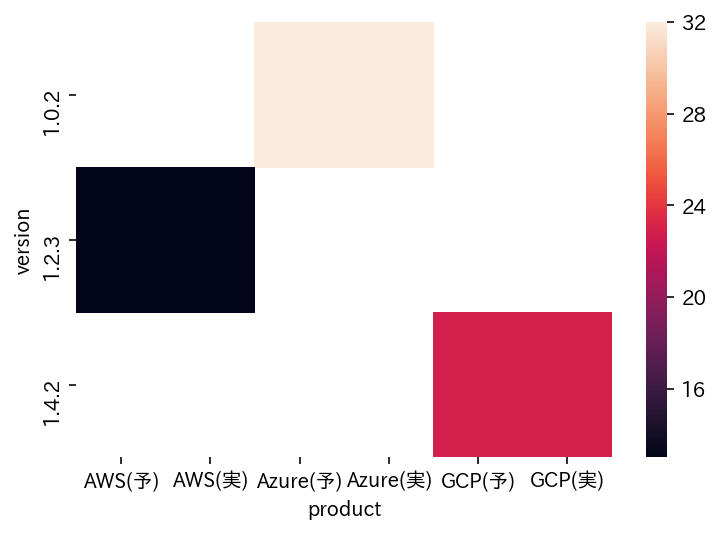

In [25]:
_ = sns.heatmap(df_pivot)

### もう一つの例

In [78]:
%%bash
echo "
product, c1, c2, c3, c4, c5, c6, c7, c8, c9
AWS,1.2.3,3,4,6, 1, 0, 3, 4, 5, 3, 6
GCP,1.4.2,3,4,3, 4, 0, 1, 5, 3, 4, 6
Azure,1.0.2,2,3,3, 1, 0, 0, 3, 5, 3
" > temp.csv

In [79]:
df = pd.read_csv('temp.csv')

In [80]:
df_heatmap = df.iloc[:, 1:]
df_heatmap

,,c1,c2,c3,c4,c5,c6,c7,c8,c9
AWS,1.2.3,4,6,1,0,3,4,5,3,6.0
GCP,1.4.2,4,3,4,0,1,5,3,4,6.0
Azure,1.0.2,3,3,1,0,0,3,5,3,NaN


## ヒートマップ

In [111]:
#cmap = sns.color_palette('nipy_spectral', 200)
#cmap = sns.color_palette('coolwarm', 200)
#cmap = sns.color_palette('Reds', 50)
cmap = sns.color_palette('rainbow', n_colors=50)

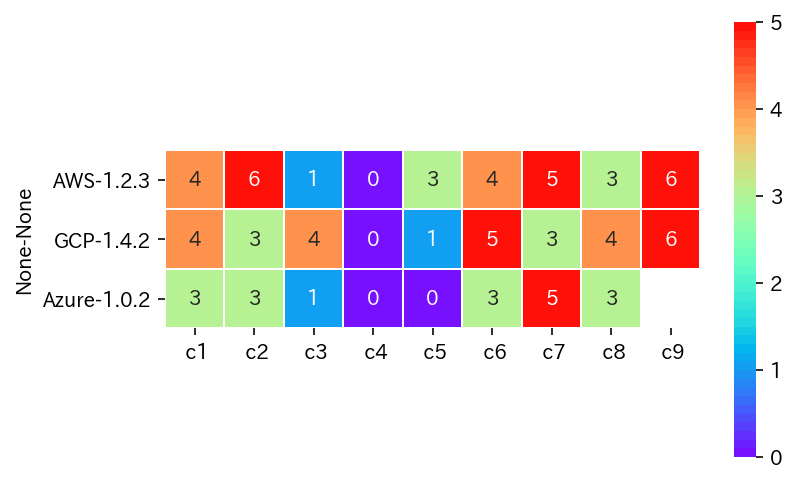

In [112]:
_ = sns.heatmap(df_heatmap, square=True, annot=True, linewidths=.5, vmin=0, vmax=5, cmap=cmap)

## 製品ごとの不良摘出状況（予算と実績の比較）

In [16]:
%%bash
echo "
product,version,CT, ST, UCT
AWS(予),1.2.3,13,14,15
AWS(実),1.2.3,13,14,16
GCP(予),1.4.2,23,24, 17
GCP(実),1.4.2,23,24,19
Azure(予),1.0.2,32,33,34
Azure(実),1.0.2,32,33,34
" > temp.csv

In [17]:
df = pd.read_csv('temp.csv')

In [18]:
df

,product,version,CT,ST,UCT
0,AWS(予),1.2.3,13,14,15
1,AWS(実),1.2.3,13,14,16
2,GCP(予),1.4.2,23,24,17
3,GCP(実),1.4.2,23,24,19
4,Azure(予),1.0.2,32,33,34
5,Azure(実),1.0.2,32,33,34


In [19]:
df_i = df.set_index('product')

In [20]:
df_i

,version,CT,ST,UCT
product,,,,
AWS(予),1.2.3,13,14,15
AWS(実),1.2.3,13,14,16
GCP(予),1.4.2,23,24,17
GCP(実),1.4.2,23,24,19
Azure(予),1.0.2,32,33,34
Azure(実),1.0.2,32,33,34


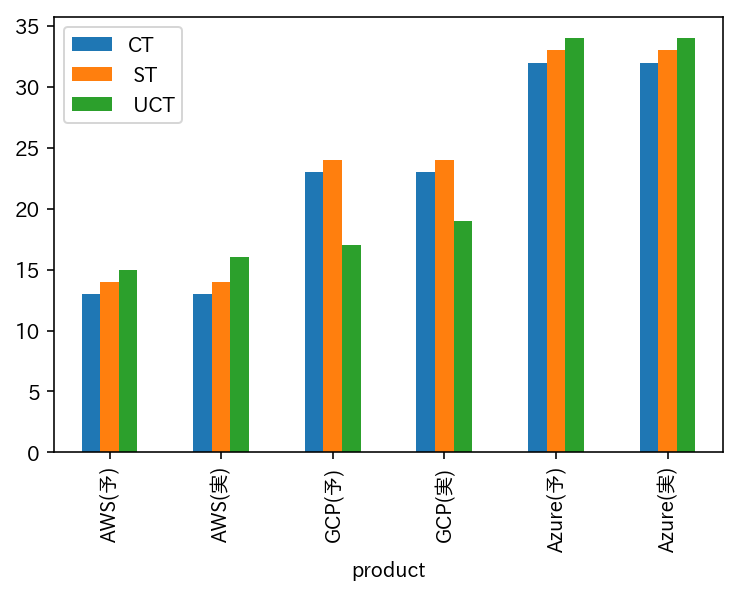

In [21]:
df_i.plot.bar()

In [22]:
df_i2 = df_i.iloc[:, 1:4]

## 工程ごとの不良摘出状況（予算と実績の比較）

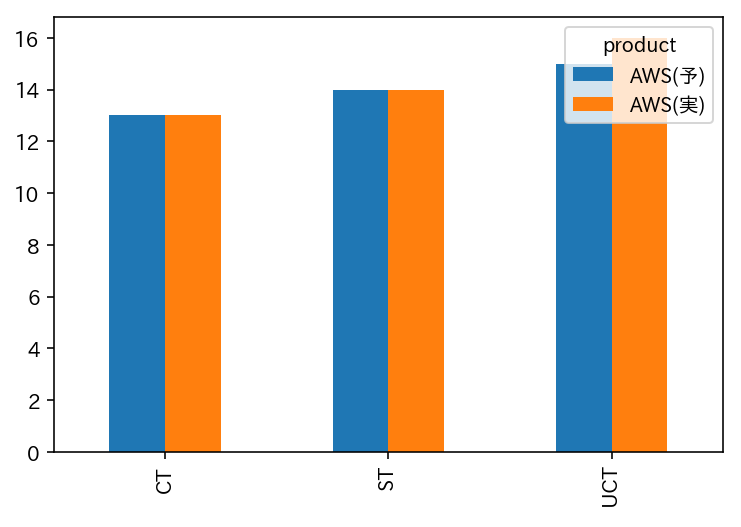

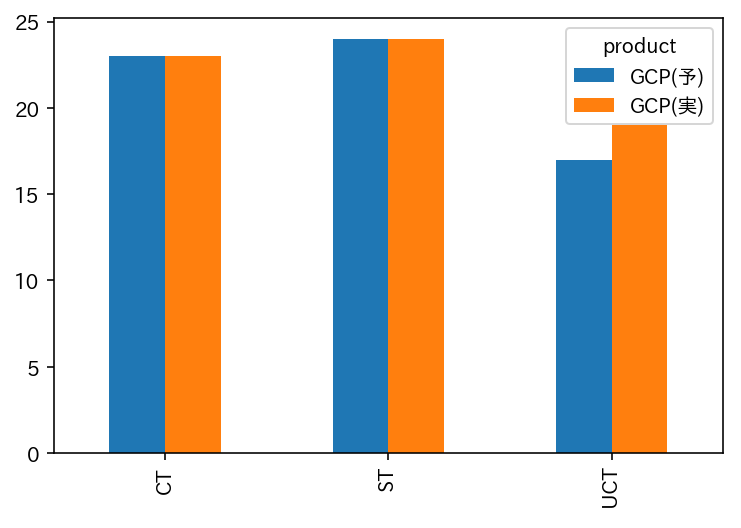

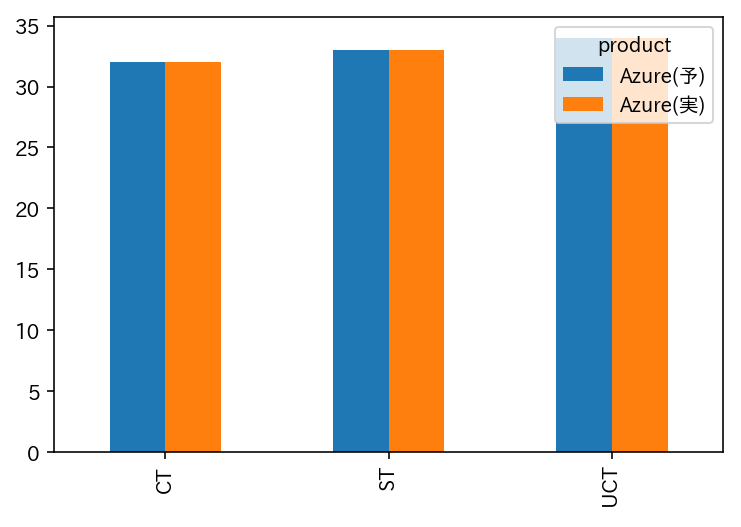

In [131]:
_ = df_i2[0:2].T.plot.bar()
_ = df_i2[2:4].T.plot.bar()
_ = df_i2[4:6].T.plot.bar()

In [130]:
# TODO: seabornでbarplotできたらもっときれいなのに。。。

# Jupyter notebookのTips

- Jupyter 知っておくと少し便利なTIPS集 
https://qiita.com/simonritchie/items/d7dccb798f0b9c8b1ec5

- Jupyter Notebook の Tips をまとめてみた
https://adtech.cyberagent.io/techblog/archives/2317

# スクリプトを非表示にするボタン

In [24]:
from IPython.display import HTML

HTML("""
<button id="code-show-switch-btn">スクリプトを非表示にする</button>

<script>
var code_show = true;

function switch_display_setting() {
    var switch_btn = $("#code-show-switch-btn");
    if (code_show) {
        $("div.input").hide();
        code_show = false;
        switch_btn.text("スクリプトを表示する");
    }else {
        $("div.input").show();
        code_show = true;
        switch_btn.text("スクリプトを非表示にする");
    }
}

$("#code-show-switch-btn").click(switch_display_setting);
</script>
""")